# CEPEA - Soja

## Problem Definition

## Getting Started

In [1]:
# https://www.cepea.esalq.usp.br/br/indicador/milho.aspx
gc()
rm(list = ls())
options(warn = -1)  # Suppress warnings globally

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,649636,34.7,1439047,76.9,1031485,55.1
Vcells,1209355,9.3,8388608,64.0,1925751,14.7


### Load Libraries

In [41]:
suppressMessages(library(readxl))
suppressMessages(library(conflicted))
suppressMessages(library(lubridate))
suppressMessages(library(tibbletime))
suppressMessages(library(forecast))
suppressMessages(library(TSstudio))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))
#suppressMessages(library(tigerstats))

### Load Dataset

In [8]:
filename <- '../_data/cepea-soja.xlsx'
df <- read_excel(filename)
tail(df)

Data,À vista R$,À vista US$
<chr>,<dbl>,<dbl>
27/04/2023,136.18,27.33
28/04/2023,136.88,27.44
02/05/2023,139.97,27.73
03/05/2023,137.85,27.62
04/05/2023,138.49,27.74
05/05/2023,139.45,28.21


## Exploratory Data Analysis

In [12]:
glimpse(df)

Rows: 4,274
Columns: 3
$ Data          <chr> "13/03/2006", "14/03/2006", "15/03/2006", "16/03/2006", …
$ `À vista R$`  <dbl> 27.66, 27.45, 27.58, 26.97, 26.96, 27.36, 27.55, 27.84, …
$ `À vista US$` <dbl> 12.96, 12.91, 13.00, 12.78, 12.68, 12.73, 12.67, 12.94, …


In [13]:
df$Data <- as.Date(dmy(df$Data))

# renomeando as variáveis

df <- df %>% 
  dplyr::rename(date = Data,
                preco_real = `À vista R$`,
                preco_dolar = `À vista US$` )
glimpse(df)

Rows: 4,274
Columns: 3
$ date        <date> 2006-03-13, 2006-03-14, 2006-03-15, 2006-03-16, 2006-03-1…
$ preco_real  <dbl> 27.66, 27.45, 27.58, 26.97, 26.96, 27.36, 27.55, 27.84, 27…
$ preco_dolar <dbl> 12.96, 12.91, 13.00, 12.78, 12.68, 12.73, 12.67, 12.94, 12…


In [14]:
tail(df)

date,preco_real,preco_dolar
<date>,<dbl>,<dbl>
2023-04-27,136.18,27.33
2023-04-28,136.88,27.44
2023-05-02,139.97,27.73
2023-05-03,137.85,27.62
2023-05-04,138.49,27.74
2023-05-05,139.45,28.21


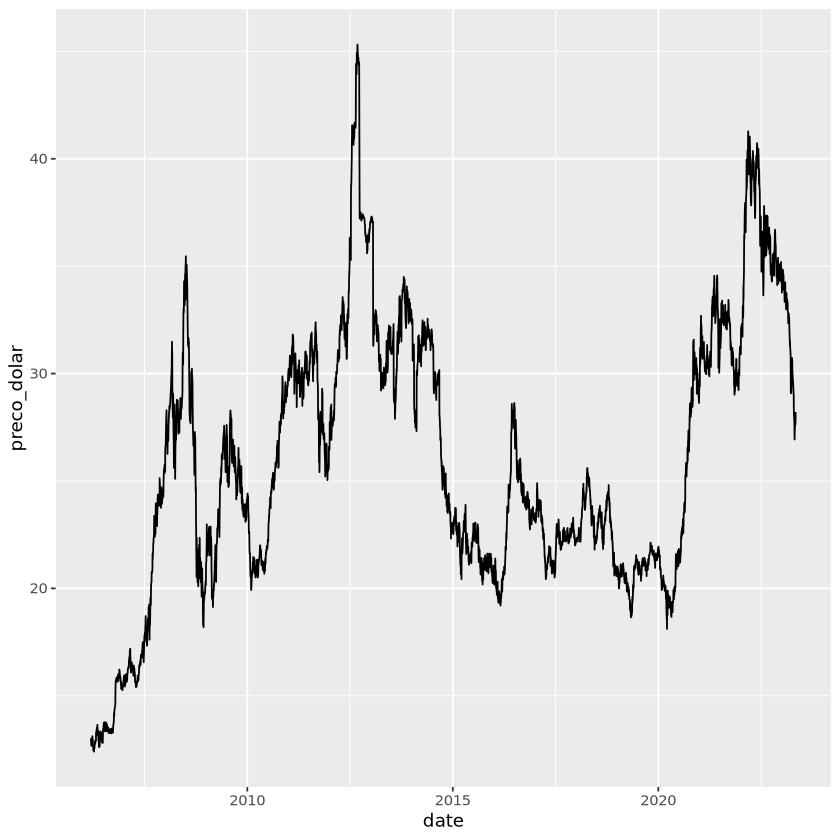

In [17]:
ggplot(df, aes( date, preco_dolar))+
  geom_line()

In [18]:
# usando o tibletime para converter em mês

df_tb <- as_tibble(df)

df_tt <- as_tbl_time(df_tb, index = date)

df_mes <- as_period(df_tt, period = '1 month', side = 'end')

glimpse(df_mes)

Rows: 207
Columns: 3
Index: date
$ date        <date> 2006-03-31, 2006-04-28, 2006-05-31, 2006-06-30, 2006-07-3…
$ preco_real  <dbl> 27.54, 27.67, 29.50, 29.17, 29.30, 28.80, 29.62, 33.69, 34…
$ preco_dolar <dbl> 12.72, 13.26, 12.70, 13.47, 13.47, 13.43, 13.64, 15.72, 15…


In [19]:
head(df_mes)
tail(df_mes)

date,preco_real,preco_dolar
<date>,<dbl>,<dbl>
2006-03-31,27.54,12.72
2006-04-28,27.67,13.26
2006-05-31,29.50,12.70
2006-06-30,29.17,13.47
2006-07-31,29.30,13.47
2006-08-31,28.80,13.43


date,preco_real,preco_dolar
<date>,<dbl>,<dbl>
2022-12-29,184.43,34.93
2023-01-31,173.93,34.25
2023-02-28,168.90,32.35
2023-03-31,153.76,30.33
2023-04-28,136.88,27.44
2023-05-05,139.45,28.21


In [20]:
max(df_mes$preco_dolar)


[1] 44.93

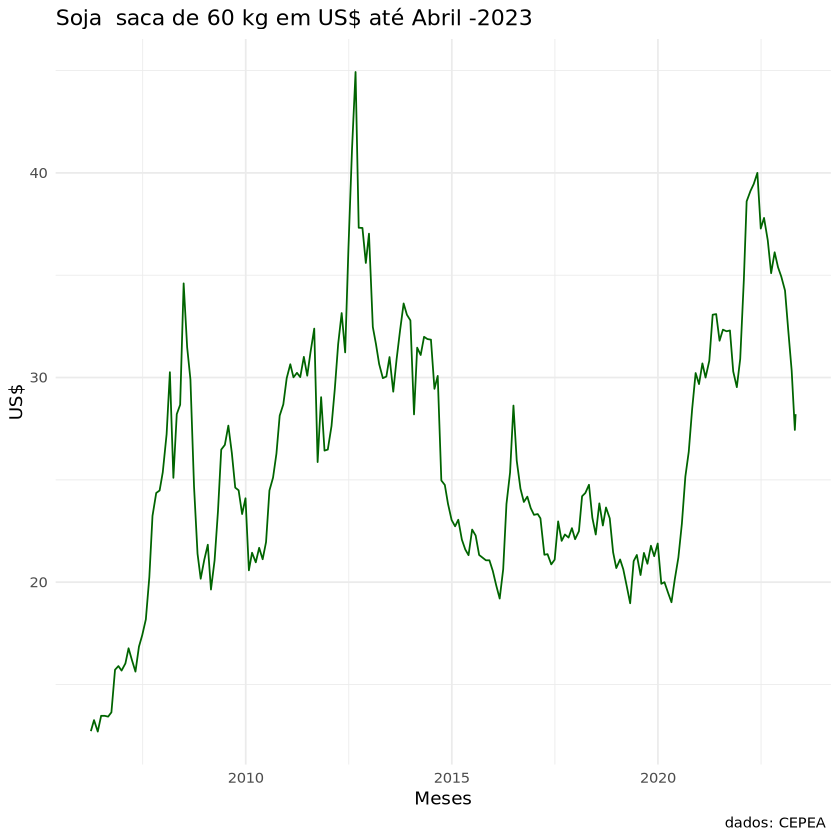

In [21]:
ggplot(df_mes, aes( date, preco_dolar))+
  geom_line(color = "darkgreen")+ theme_minimal()+
  labs( x = "Meses",
        y = "US$",
       title = "Soja  saca de 60 kg em US$ até Abril -2023",
        caption = "dados: CEPEA ")

In [22]:
head(df_mes)
tail(df_mes)

date,preco_real,preco_dolar
<date>,<dbl>,<dbl>
2006-03-31,27.54,12.72
2006-04-28,27.67,13.26
2006-05-31,29.50,12.70
2006-06-30,29.17,13.47
2006-07-31,29.30,13.47
2006-08-31,28.80,13.43


date,preco_real,preco_dolar
<date>,<dbl>,<dbl>
2022-12-29,184.43,34.93
2023-01-31,173.93,34.25
2023-02-28,168.90,32.35
2023-03-31,153.76,30.33
2023-04-28,136.88,27.44
2023-05-05,139.45,28.21


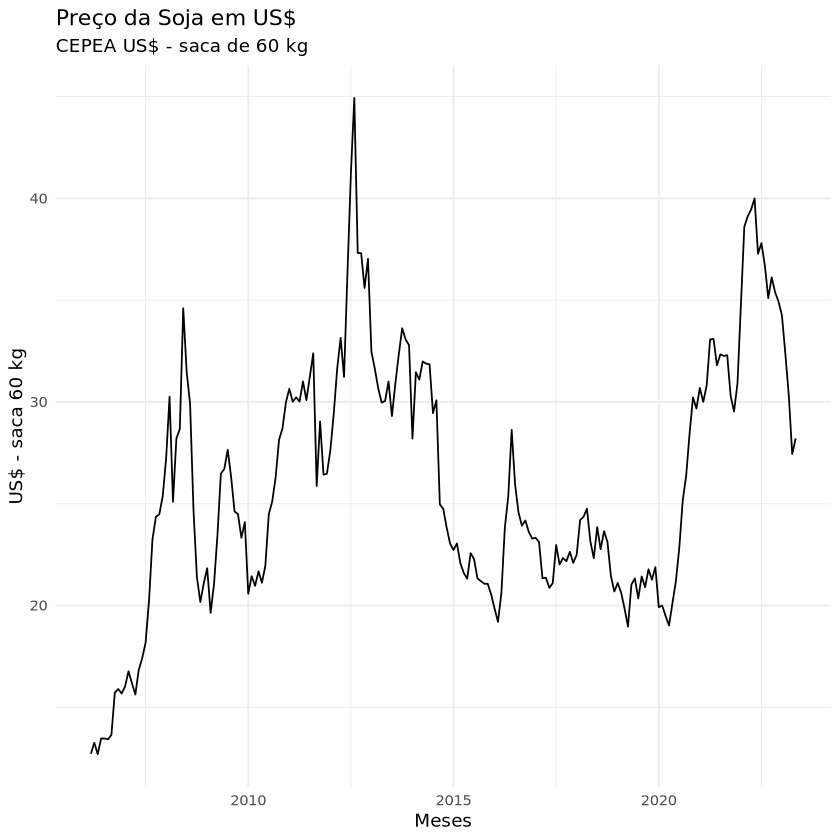

In [23]:
soja <- ts(df_mes$preco_dolar, frequency =12, start= c(2006,3), end = c(2023,05))

autoplot(soja)+
  labs( x = "Meses",
        y = "US$ - saca 60 kg",
        title = "Preço da Soja em US$",
        subtitle = "CEPEA US$ - saca de 60 kg")+
  theme_minimal()

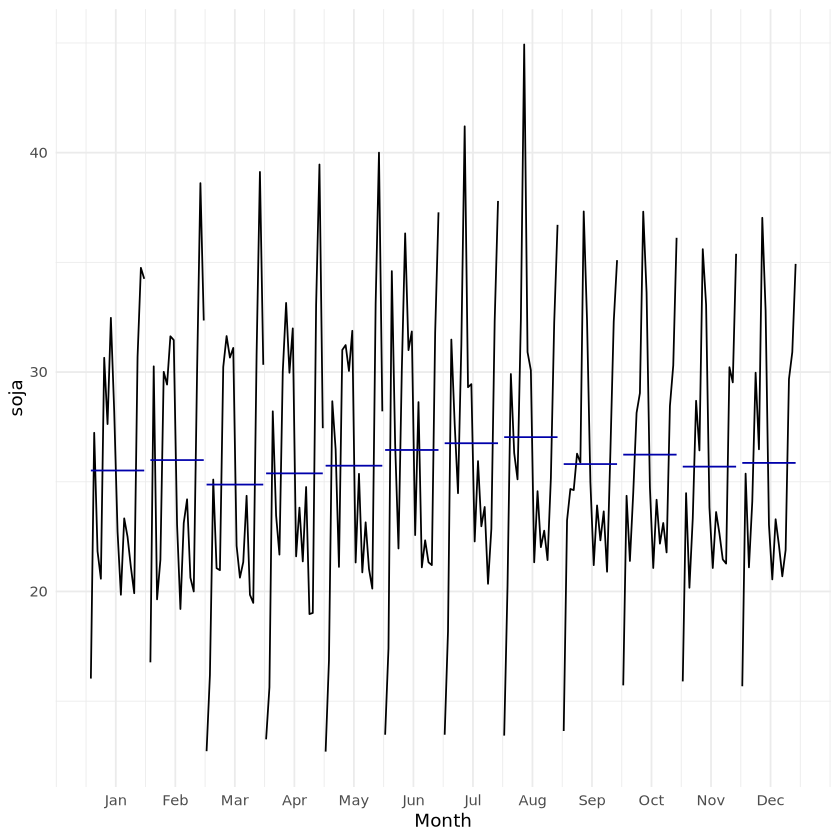

In [ ]:
ggsubseriesplot(soja)+theme_minimal()

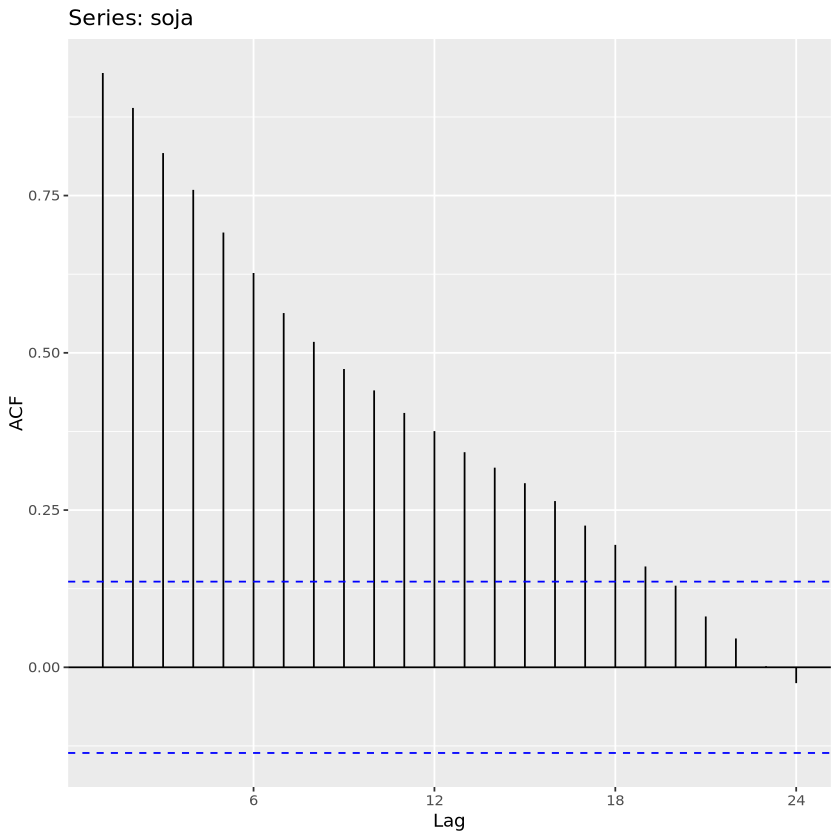

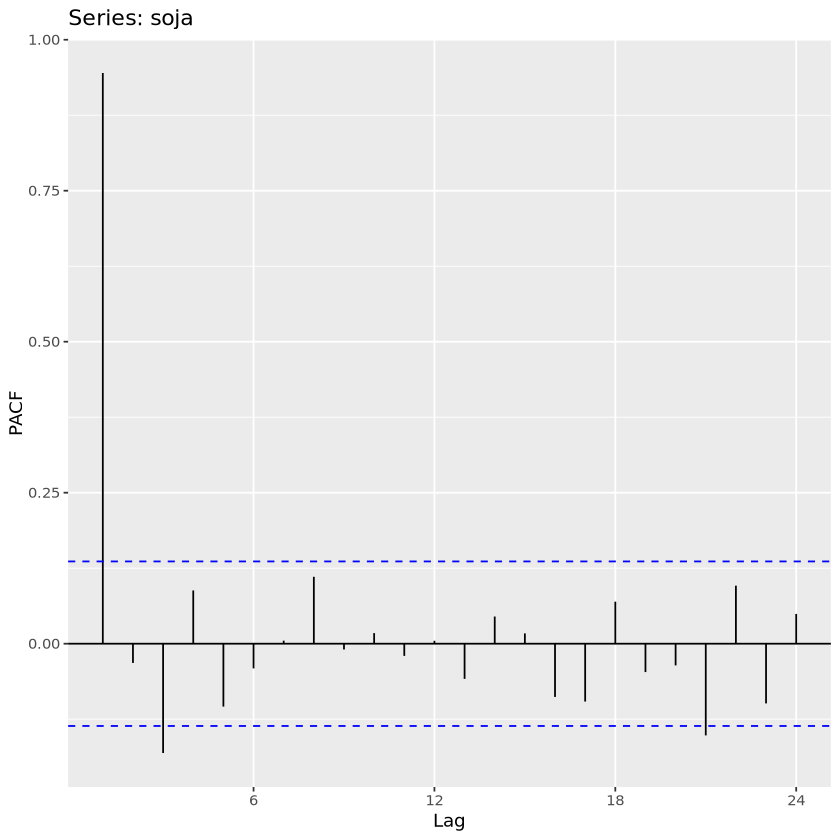

In [25]:

ggAcf(soja)
ggPacf(soja)

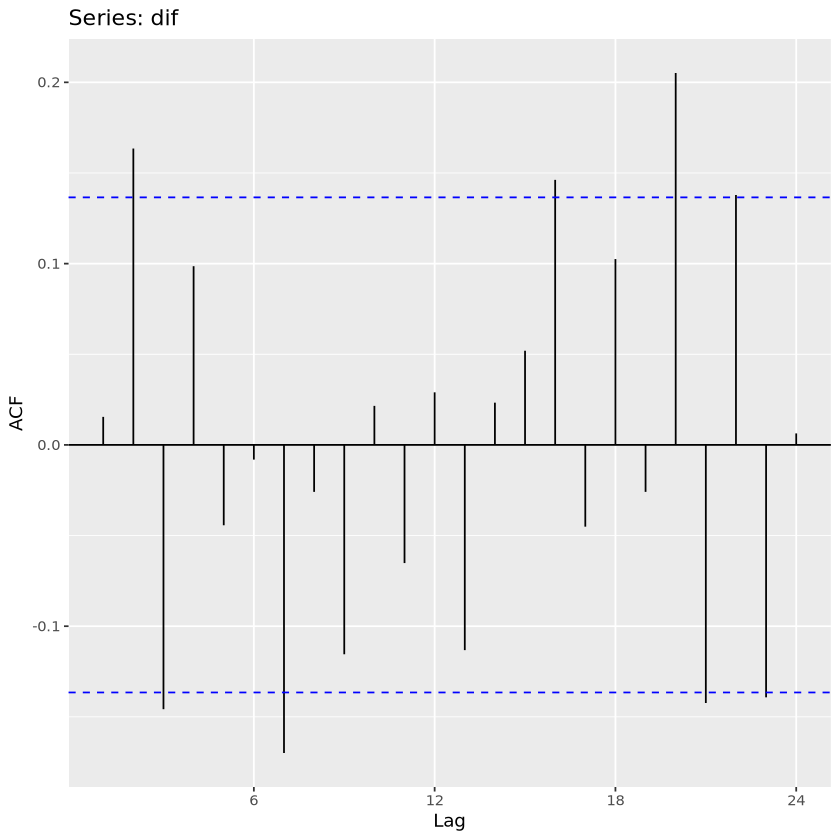

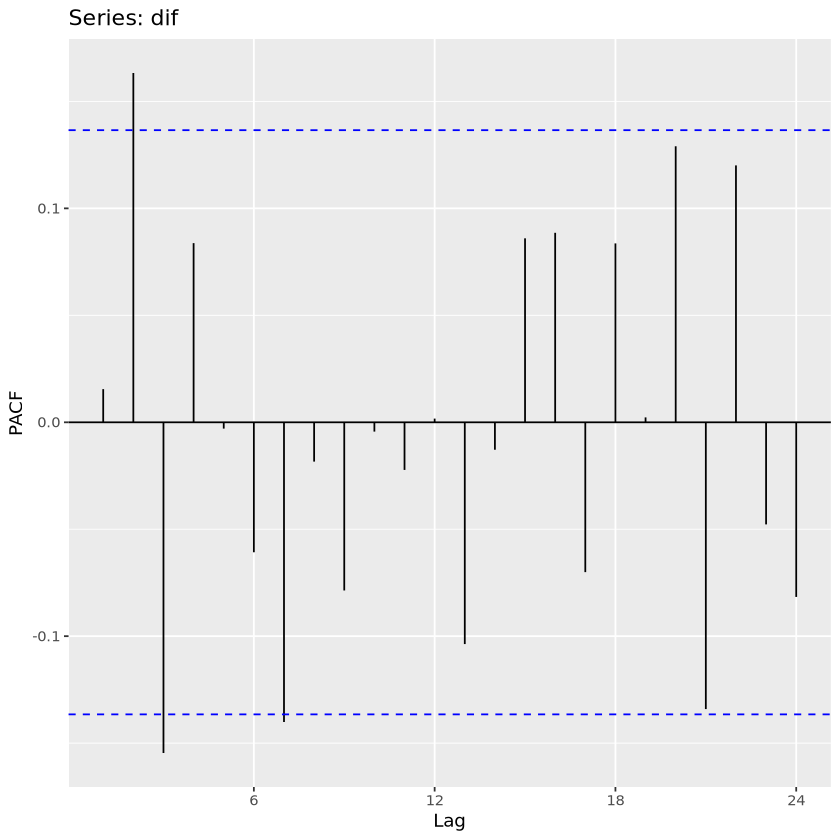

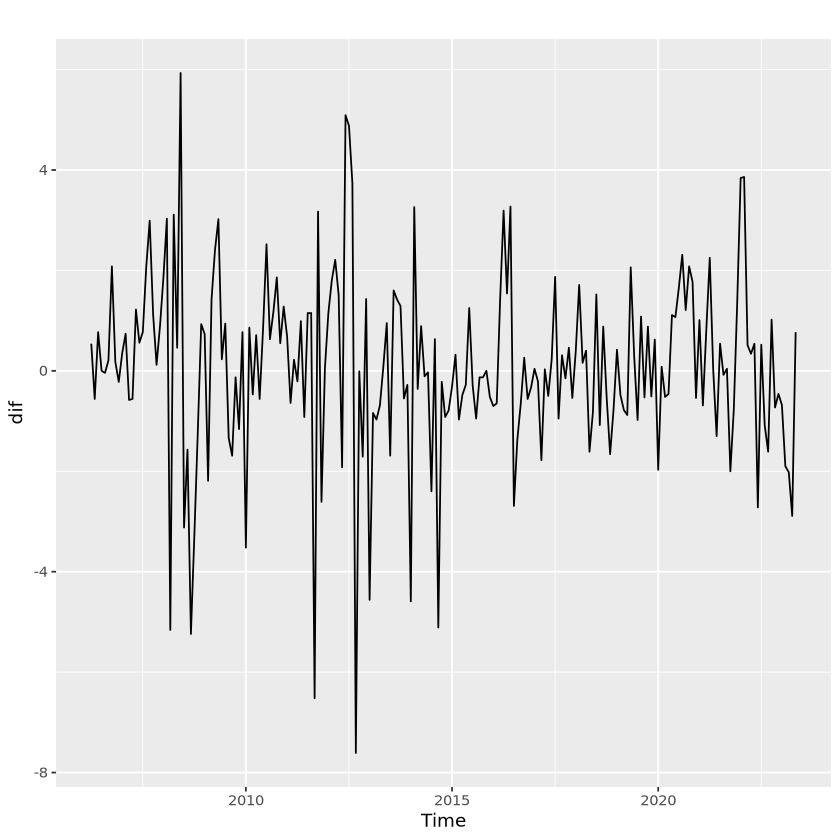

In [28]:
dif <- diff(soja)
ggAcf(dif)
ggPacf(dif)
autoplot(dif)

In [29]:
ndiffs(soja)

[1] 1

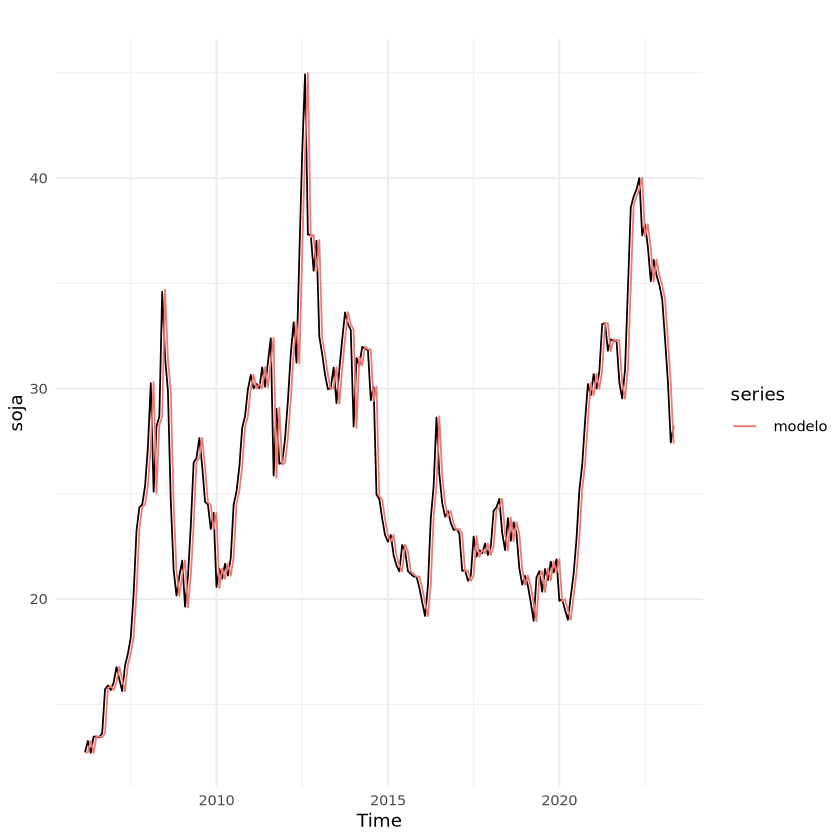

In [30]:
modelo <- Arima(soja, order = c(1,1,0))

autoplot(soja)+
  autolayer(modelo$fitted, series = " modelo")+
  theme_minimal()


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 60.127, df = 23, p-value = 3.663e-05

Model df: 1.   Total lags used: 24



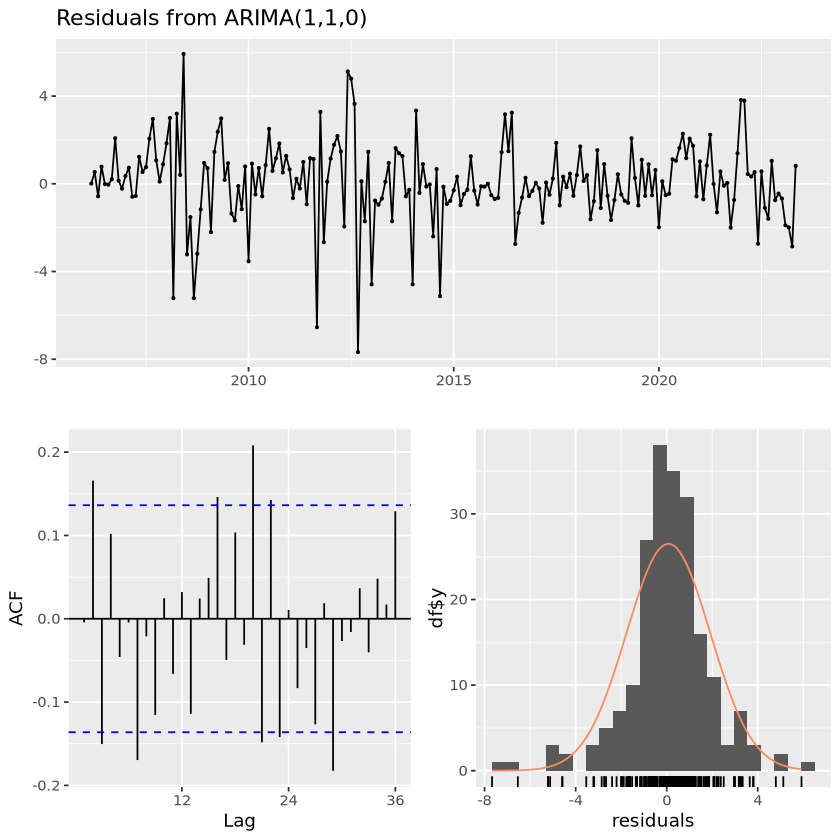

In [ ]:
checkresiduals(modelo)

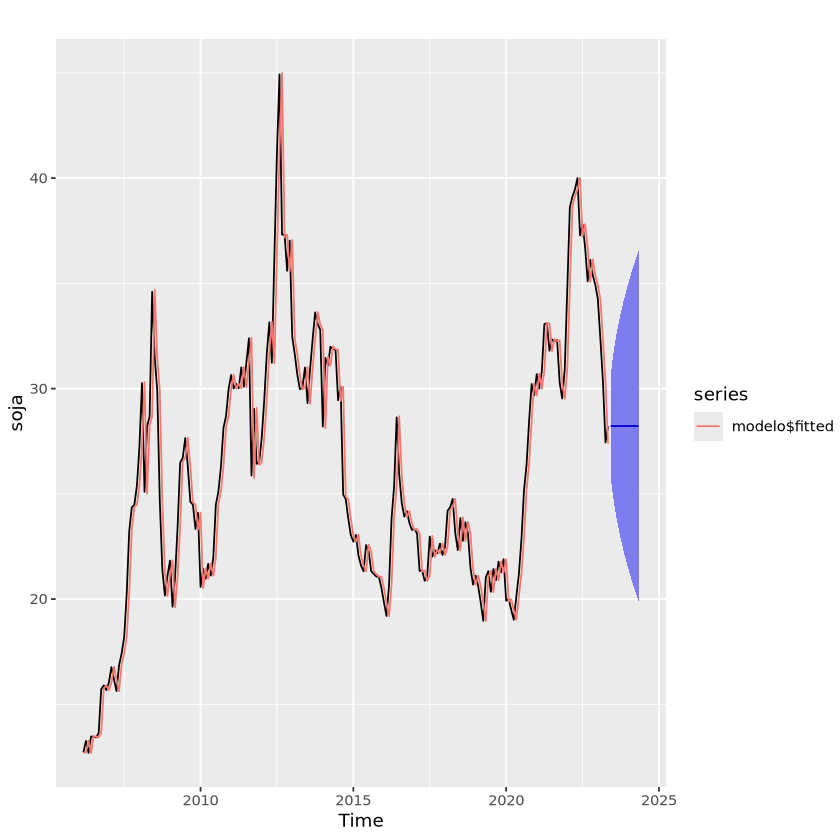

In [33]:
predicao <- forecast(modelo, h = 12, level = c(80))
autoplot(soja)+
  autolayer(modelo$fitted)+
  autolayer(predicao)

In [34]:
sim <- forecast_sim(modelo,
                    n = 1000,
                    h = 12,
                    sim_color = "red",
                    opacity = 0.1, 
                    plot = TRUE)

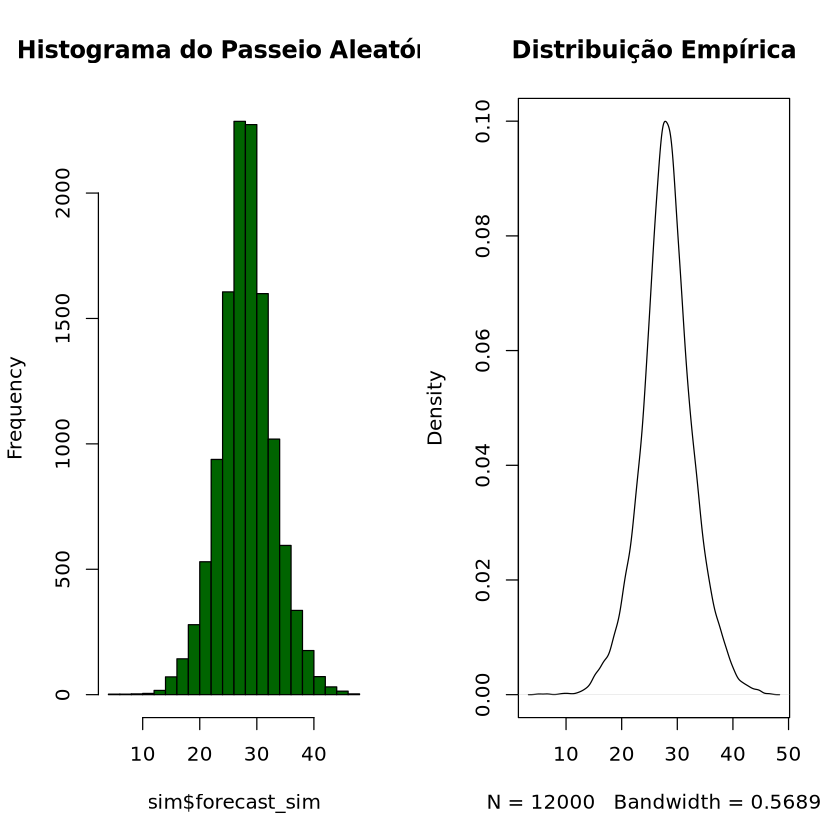

In [35]:
par(mfrow=c(1,2))
hist(sim$forecast_sim,  main='Histograma do Passeio Aleatório', col = "darkgreen")
plot(density(sim$forecast_sim), main='Distribuição Empírica')
par(mfrow=c(1,1))

In [ ]:
qnormGC(0.68,region="between",mean=mean(sim$forecast_sim),
        sd= sd(sim$forecast_sim), graph=TRUE)

ERROR: Error in qnormGC(0.68, region = "between", mean = mean(sim$forecast_sim), : could not find function "qnormGC"
